# Task 2
## *Chest X-Rays Nodules Classifier*

Importing the required modules for image extraction using *Pillow*

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
train_img_path = "./train_images"
x_train = []
for filename in os.listdir(train_img_path):
  img = Image.open(os.path.join(train_img_path, filename))
  img = img.convert("RGB")
  data = np.array(img)
  data = data.astype(float) / 255.0
  x_train.append(data)

Example Chest X-Ray from the Dataset

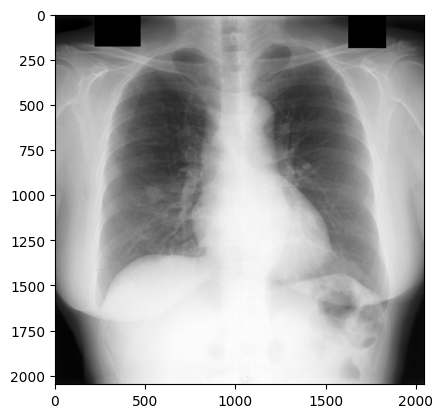

In [3]:
plt.imshow(x_train[20])

In [4]:
input_shape=x_train[0].shape
len(x_train)

200

Splitting the given data into two parts (160,40) for training - 160 and testing - 40

In [5]:
x_test = x_train[160:]
x_train = x_train[:160]

In [6]:
print("x-train",len(x_train))
print("x-test",len(x_test))

x-train 160
x-test 40


Importing the annotations of the X-Rays from the csv file

In [7]:
y_train = pd.read_csv("./train_annotations.csv")
y_train

,Name,State
0,IMG_1.jpg,malignant
1,IMG_2.jpg,non-nodule
2,IMG_3.jpg,non-nodule
3,IMG_4.jpg,malignant
4,IMG_5.jpg,non-nodule
...,...,...
195,IMG_196.jpg,malignant
196,IMG_197.jpg,malignant
197,IMG_198.jpg,non-nodule
198,IMG_199.jpg,malignant


In [8]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    200 non-null    object
 1   State   200 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


We cannot work with category names. So we are converting it into an array of size 3 ( as number of classes are 3 ).
Here the y_train contains array of arrays specifying the category like "array([1.,0.,0.])".

In [9]:
y_train.drop(columns=["Name"],inplace=True)
y_train["State"] = y_train["State"].astype('category').cat.codes
y_train

,State
0,1
1,2
2,2
3,1
4,2
...,...
195,1
196,1
197,2
198,1


In [10]:
from tensorflow import keras

In [11]:
num_classes = 3
y_train = keras.utils.to_categorical(y_train,num_classes)
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

Splitting the categories(outputs) for training data.

In [12]:
y_test = y_train[160:]
y_train = y_train[:160]

In [13]:
print("y-train",len(y_train))
print("y-test",len(y_test))

y-train 160
y-test 40


Importing the required libraries for the *Convolutional Neural Network CNN* algorithm which widely used for image processings.

In [14]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

* It works based on the pixels of the given image.
* Each pixel have a value determined by the brigthness of the pixel.
* Based on the values of each pixel, the dimensions of the image will be centralised.
* *CNN* follows both forward propogation and back propogation depenfing upon the loss function. If the loss function is reduced, it will propogate forward else, it will propogate back until it is reduced.
* It uses moe than 2 layers for classifying. one for input, one for output and the rest for feature engineering.

Here I have created a simple CNN model having a single layer in between input and output. The output after centralising the image will flattened and a singe value is obtained.

In [15]:
model_1 = Sequential()
# Input Layer
# 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',input_shape=input_shape))
model_1.add(Activation('relu'))

# Layer 2
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

#Flattening the image
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(3))
model_1.add(Activation('softmax'))

model_1.summary()

C:\Users\jayan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1024, 1024, 32) │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024, 1024, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 510, 510, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 510, 510, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2080800)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │ 1,065,370,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,065,399,715 (3.97 GB)

 Trainable params: 1,065,399,715 (3.97 GB)

 Non-trainable params: 0 (0.00 B)

In [16]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

C:\Users\jayan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


MemoryError: Unable to allocate 48.0 MiB for an array with shape (2048, 2048, 3) and data type float32